# Stock Analysis using DBSCAN 

In [28]:
#packages
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#importing the dataset
stocks = pd.read_csv('top_50_stocks.csv')
stocks.head()

#numerical modifications
stocks['Liquidity_Ratio'] = stocks['Liquidity_Ratio'] / 100
stocks['PE_Ratio'] = stocks['PE_Ratio'] / 100
stocks.head()

,Ticker,Liquidity_Ratio,PE_Ratio,Dividend_Yield
0,VALE3,1.24,10.82,10.59
1,PETR4,0.82,5.12,10.49
2,ITUB4,0.00,10.01,11.37
3,AXIA3,1.92,-24.54,7.11
4,BBDC4,0.00,8.37,7.90


In [27]:
#DBSCAN tests
from sklearn.preprocessing import RobustScaler
stock_metrics = stocks[['Liquidity_Ratio','PE_Ratio','Dividend_Yield']]

#scaling
scaler = RobustScaler()
scaled_metrics = scaler.fit_transform(stock_metrics)

from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 0.7, min_samples=2)

clusters = model.fit_predict(scaled_metrics)

stocks['Cluster'] = clusters
print(stocks['Cluster'].value_counts())

Cluster
 0    27
-1    15
 1     4
 2     2
 3     2
Name: count, dtype: int64


## Static Analysis ##

It appears that we got 15 outliers with the current parameters. Let's try to visualise the behavior of each indicators by Cluster created.

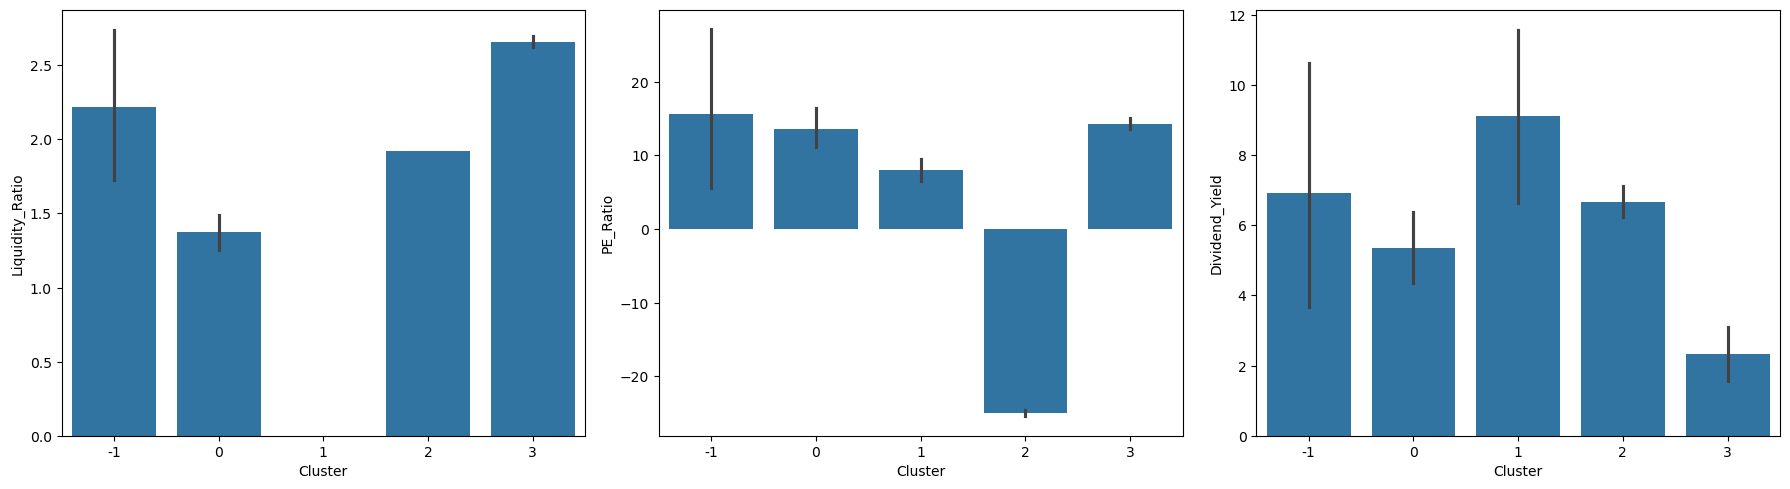

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=stocks, x='Cluster', y='Liquidity_Ratio', ax=axes[0])


sns.barplot(data=stocks, x='Cluster', y='PE_Ratio', ax=axes[1])


sns.barplot(data=stocks, x='Cluster', y='Dividend_Yield', ax=axes[2])

plt.tight_layout()
plt.show();

We can already derive some insights:
1. Cluster 2 has a negative PE Ratio which means the company recorded net losses. One would like to avoid this kind of stock
2. The outliers Cluser -1 looks like the most promissing. It has high average liquidity and both PE and DY vary between somewhat comfortable bands. It would be a good start for stock selection.


## Vizualizing in 3D ##

We can also visualise the metrics in 3-D allowing us to identify groups of stocks based on potential growth, safe returns or other desired metric.

To speed things up, I first create a benchmark filter for all the indicators as a way to exclude junk stocks from the analysis:
1. Minimal PE ratio as 0.1
2. Maximum PE ratio as 20
3. Minimum DY of 4%
4. Minimum Liquidity rate of 1

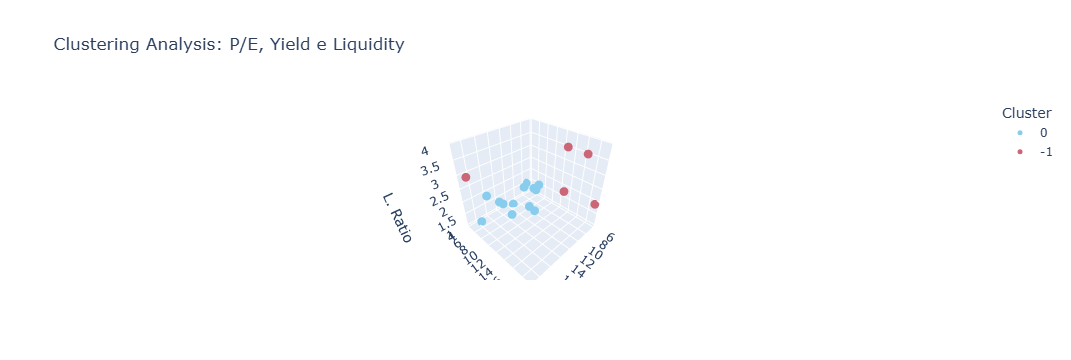

In [42]:
#benchmarks
pe_min = 0.1       
pe_max = 20.0      
dy_min = 4.0       
liq_min = 1.0      

#applying filters
stocks_top = stocks[
    (stocks['PE_Ratio'] > pe_min) & 
    (stocks['PE_Ratio'] <= pe_max) & 
    (stocks['Dividend_Yield'] >= dy_min) & 
    (stocks['Liquidity_Ratio'] >= liq_min)
].copy()

import plotly.express as px

stocks_top['Cluster'] = stocks_top['Cluster'].astype(str)

fig = px.scatter_3d(stocks_top, 
                    x='PE_Ratio', 
                    y='Dividend_Yield', 
                    z='Liquidity_Ratio',
                    color='Cluster',
                    hover_name=stocks_top['Ticker'],
                    title='Clustering Analysis: P/E, Yield e Liquidity',
                    labels={'PE_Ratio': 'P/E', 
                            'Dividend_Yield': 'DY', 
                            'Liquidity_Ratio': 'L. Ratio'},
                    color_discrete_sequence=px.colors.qualitative.Safe)


fig.update_traces(marker=dict(size=5))

fig.show()

## Identidying opportunities and conclusions ##

From the graph we can spot:

1. Safe bets / Cash cows (fair PE ratio, high liquidity and DY). DIRR3, CYRE3, ITSA4 are examples
2. Candidates for future growth (fair PE ratio, low DY but high liquidity). The low DY might indicate that the company is investing in expansion and scale. ENGIE2, TAEE11 and LREN3 are examples

However, the analysis is not exhaustive. Future projects might focus on the realities of specific sectors (construction, retail) to refine the analysis of indicators. 